In [86]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

In [126]:
def to_relative(df):
    start = df.start.min()
    df.start = df.start - start
    df.end = df.end - start
    return df

def plot_timechart(timing_df):
    idx_list = sorted(list(set(df.node.values)))
    print(idx_list)
    plt.figure(figsize=(20, 10))
    for i, node in enumerate(idx_list):
        cur_df = df[timing_df.node == node]
        worker, start, end = cur_df.id, cur_df.start, cur_df.end
        plt.hlines(worker, start, end, colors='C{}'.format(i))
        plt.plot(start, worker, 'C{}^'.format(i), label=node)
        plt.xlim([0, 20])
#         plt.ylim([-1, worker.max() + 1])
#     plt.legend()

Note: `172.31.14.189` is the head node.

We want to run A3C with multiple actors at once on multiple machines. Cases where this will be used include distributed A3C implementations and multi-model training.

## Setup:
We have 2 machines, each with a set number of ray workers instantiated. We execute A3C script with n actors (simulations)

## Outline:

1. Timechart to see task placement across workers 
  1. 3 Ratios of workers --  5:5, 8:2, 2:8 (left is the driver; in all cases the driver is executed on head node.)
  2. Experiments done with 5 actors and 10 actors.
  
2. Statistics: 
  1. Actors are not moved across machines it seems. Where are actors usually started? Is it ever unbalanced?
  2. 

['172.31.14.189', '172.31.5.84']


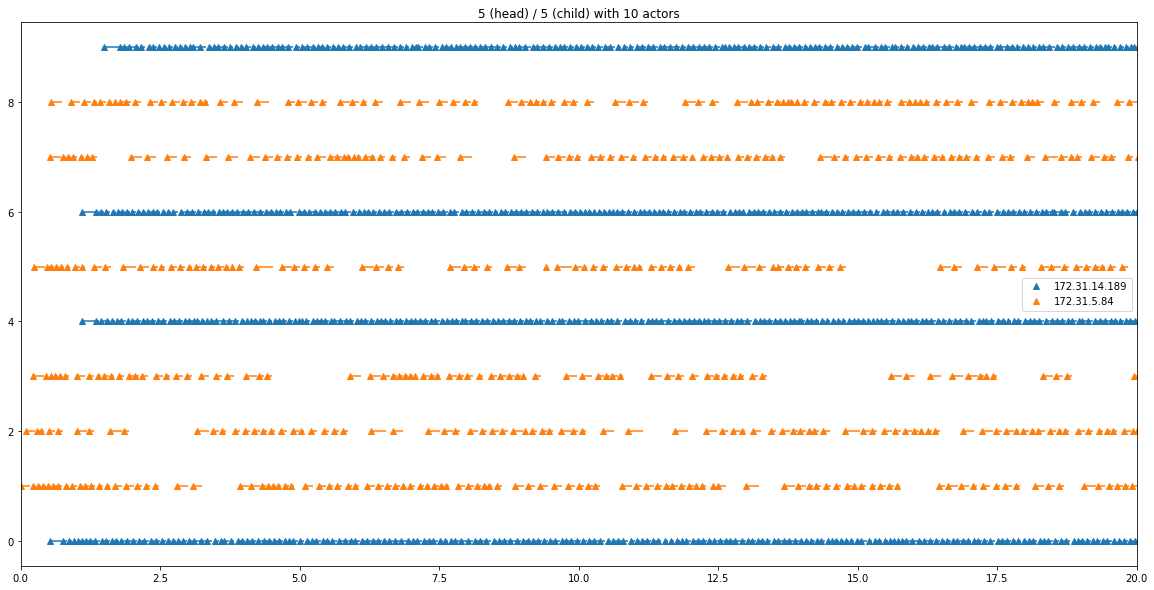

In [110]:
df = pd.read_csv("/tmp/results/timing20170331_03_00_679799.csv")
df = to_relative(df)
plot_timechart(df)
plt.title("5 (head) / 5 (child) with 10 actors")

['172.31.14.189', '172.31.5.84']


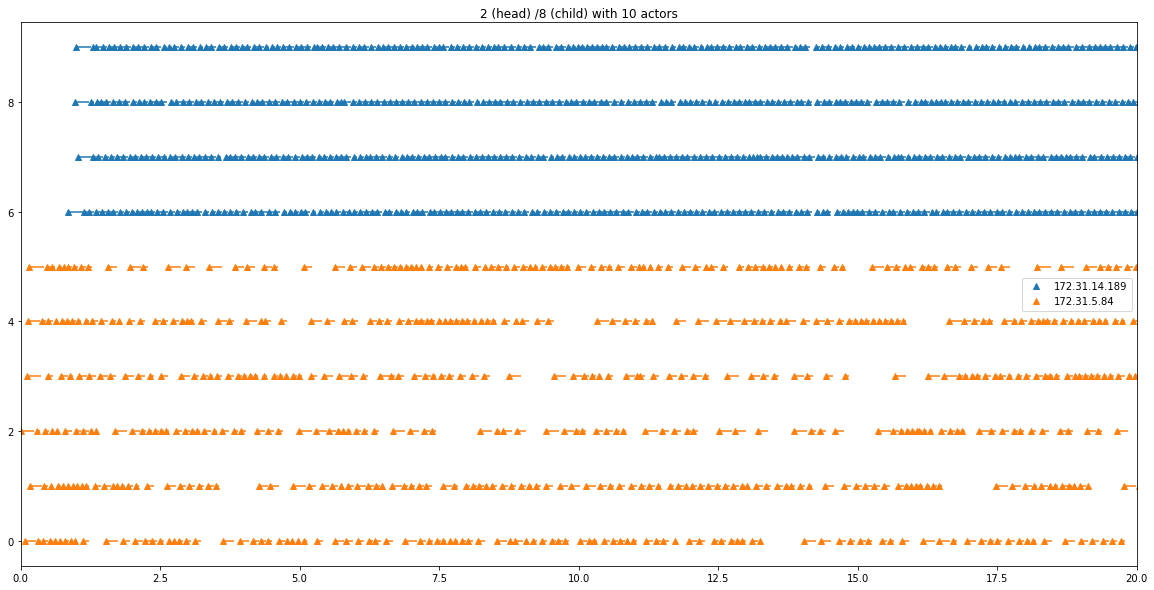

In [111]:
df = pd.read_csv("/tmp/results/timing20170331_06_36_549036.csv")
df = to_relative(df)
plot_timechart(df)
plt.title("2 (head) /8 (child) with 10 actors")

['172.31.14.189', '172.31.5.84']


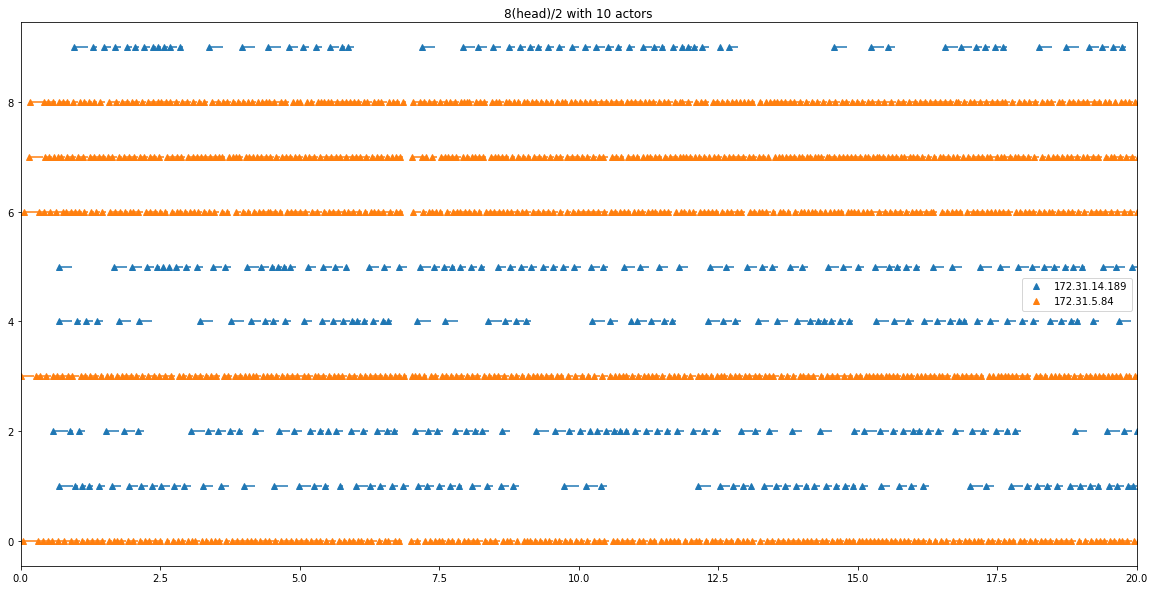

In [30]:
df = pd.read_csv("/tmp/results/timing20170331_06_40_584738.csv")
df = to_relative(df)
plot_timechart(df)
plt.title("8(head) / 2 with 10 actors")
# Note: The driver script was ran on the head but was scheduled onto the worker (repeatedly)

['172.31.5.84']


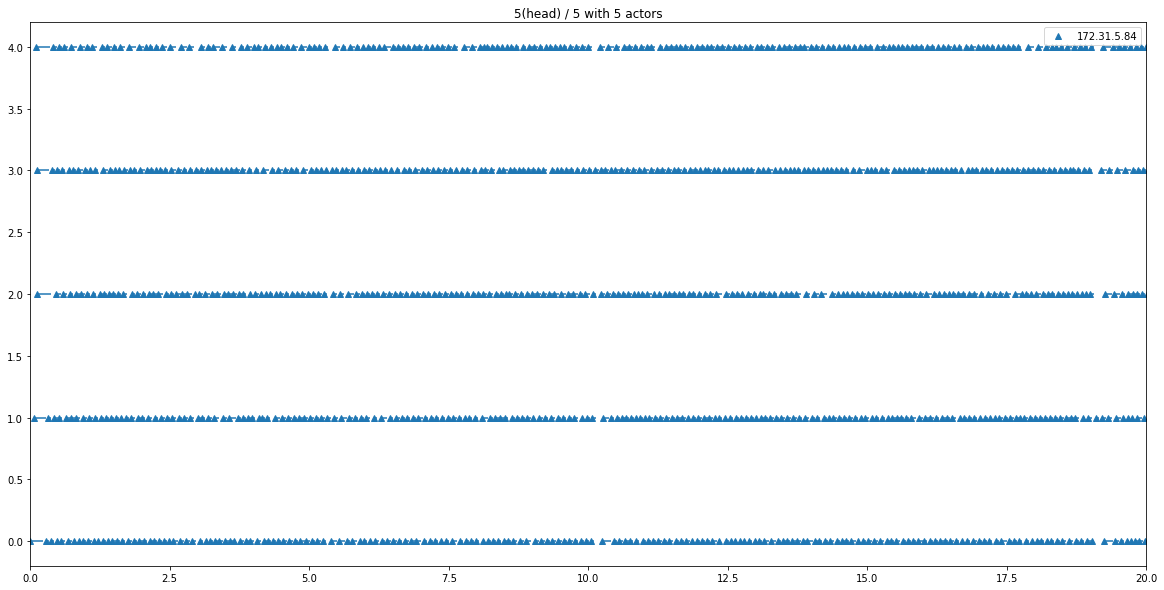

In [31]:
df = pd.read_csv("/tmp/results/timing20170331_07_01_093680.csv")
df = to_relative(df)
plot_timechart(df)
plt.title("5(head) / 5 with 5 actors")

['172.31.14.189', '172.31.5.84']


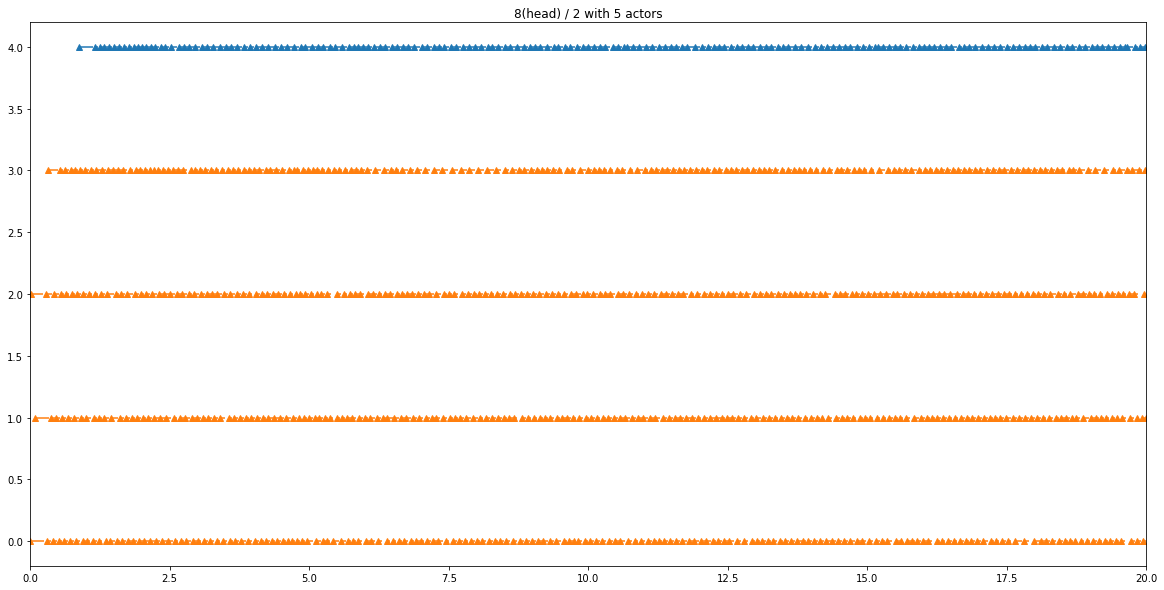

In [127]:
df = pd.read_csv("/tmp/results/timing20170331_07_09_237211.csv")
df = to_relative(df)
plot_timechart(df)
plt.title("8(head) / 2 with 5 actors")

['172.31.14.189', '172.31.5.84']


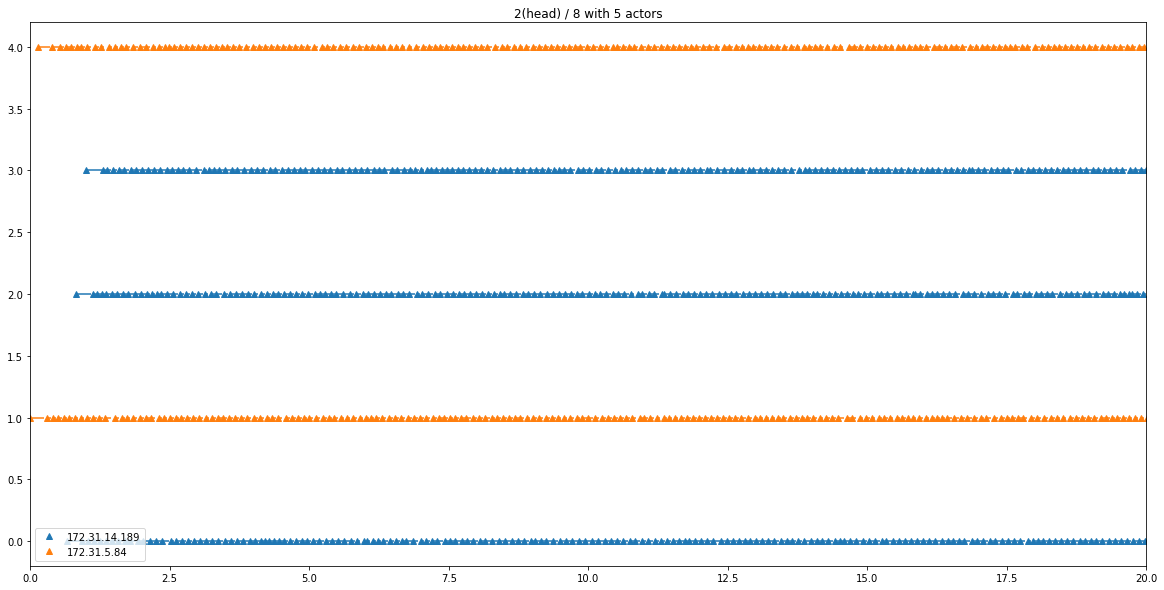

In [33]:
df = pd.read_csv("/tmp/results/timing20170331_07_12_090971.csv")
df = to_relative(df)
plot_timechart(df)
plt.title("2(head) / 8 with 5 actors")

Main questions:
1. How reproducible are these graphs? Generate 10 trials of this per setup
2. Why is throughput so low for 10 actors on the remote node? 

In [49]:
import pickle
from collections import Counter

In [59]:
def generate_stats(fname):
    with open(fname, "rb") as f:
        stats_test = pickle.load(f)
    main_counter = Counter()
    for stat in stats_test:
        counter = Counter([i["node"] for i in stat.values()])
        main_counter += counter
        print(sorted(counter.items()))
    print("Aggregate Statistics:", sorted(main_counter.items()))

In [112]:
print("5 Workers on Head, 5 workers on Child, 5 Simulations running")
generate_stats("./stats_h5_s5_w5.pkl")

5 Workers on Head, 5 workers on Child, 5 Simulations running
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.14.189', 1), ('172.31.5.84', 4)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 1), ('172.31.5.84', 4)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
Aggregate Statistics: [('172.31.14.189', 25), ('172.31.5.84', 25)]


In [115]:
print("5 Workers on Head, 5 workers on Child, 10 Simulations running")
generate_stats("./stats_h5_s5_w10.pkl")

5 Workers on Head, 5 workers on Child, 10 Simulations running
[('172.31.14.189', 4), ('172.31.5.84', 6)]
[('172.31.14.189', 4), ('172.31.5.84', 6)]
[('172.31.14.189', 8), ('172.31.5.84', 2)]
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 4), ('172.31.5.84', 6)]
[('172.31.14.189', 4), ('172.31.5.84', 6)]
[('172.31.14.189', 5), ('172.31.5.84', 5)]
[('172.31.14.189', 4), ('172.31.5.84', 6)]
[('172.31.14.189', 3), ('172.31.5.84', 7)]
Aggregate Statistics: [('172.31.14.189', 48), ('172.31.5.84', 52)]


In [113]:
print("8 Workers on Head, 2 workers on Child, 5 Simulations running")
generate_stats("./stats_h8_s2_w5.pkl")

8 Workers on Head, 2 workers on Child, 5 Simulations running
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
Aggregate Statistics: [('172.31.14.189', 28), ('172.31.5.84', 22)]


In [116]:
print("8 Workers on Head, 2 workers on Child, 10 Simulations running")
generate_stats("./stats_h8_s2_w10.pkl")

8 Workers on Head, 2 workers on Child, 10 Simulations running
[('172.31.14.189', 5), ('172.31.5.84', 5)]
[('172.31.14.189', 5), ('172.31.5.84', 5)]
[('172.31.14.189', 5), ('172.31.5.84', 5)]
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 4), ('172.31.5.84', 6)]
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 5), ('172.31.5.84', 5)]
[('172.31.14.189', 3), ('172.31.5.84', 7)]
[('172.31.14.189', 3), ('172.31.5.84', 7)]
[('172.31.14.189', 4), ('172.31.5.84', 6)]
Aggregate Statistics: [('172.31.14.189', 46), ('172.31.5.84', 54)]


In [114]:
print("2 Workers on Head, 8 workers on Child, 5 Simulations running")
generate_stats("./stats_h2_s8_w5.pkl")

2 Workers on Head, 8 workers on Child, 5 Simulations running
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 3), ('172.31.5.84', 2)]
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.14.189', 1), ('172.31.5.84', 4)]
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.5.84', 5)]
[('172.31.14.189', 4), ('172.31.5.84', 1)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
[('172.31.14.189', 2), ('172.31.5.84', 3)]
Aggregate Statistics: [('172.31.14.189', 25), ('172.31.5.84', 25)]


In [118]:
print("2 Workers on Head, 8 workers on Child, 10 Simulations running")
generate_stats("./stats_h2_s8_w10.pkl")

2 Workers on Head, 8 workers on Child, 10 Simulations running
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 2), ('172.31.5.84', 8)]
[('172.31.5.84', 10)]
[('172.31.14.189', 3), ('172.31.5.84', 7)]
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 5), ('172.31.5.84', 5)]
[('172.31.14.189', 6), ('172.31.5.84', 4)]
[('172.31.14.189', 8), ('172.31.5.84', 2)]
[('172.31.14.189', 7), ('172.31.5.84', 3)]
[('172.31.14.189', 5), ('172.31.5.84', 5)]
Aggregate Statistics: [('172.31.14.189', 48), ('172.31.5.84', 52)]


In [119]:
def get_aggregates(fname):
    with open(fname, "rb") as f:
            stats_test = pickle.load(f)
    data = []
    for idx, i in enumerate(stats_test):
        for k, w in i.items():
            data.append([w['node'], w['cpu_time'], w['count']])

    df = pd.DataFrame(data, columns=['node', 'cpu_time', 'count'])
    gp =  df.groupby('node')
    print(gp.aggregate(np.sum))

In [123]:
get_aggregates("./stats_h8_s2_w5.pkl")

                cpu_time  count
node                           
172.31.14.189  92.904486   1135
172.31.5.84    67.795854    865


In [124]:
get_aggregates("./stats_h2_s8_w10.pkl")

                cpu_time  count
node                           
172.31.14.189  95.278192    957
172.31.5.84    97.689479   1043


In [125]:
get_aggregates("./stats_h2_s8_w5.pkl")

                cpu_time  count
node                           
172.31.14.189  82.979201   1002
172.31.5.84    76.829893    998
